In [37]:
from sklearn.datasets import make_classification
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import ReLU
from tensorflow.keras.layers import LeakyReLU
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.models import load_model

In [38]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.manifold import TSNE
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [39]:
ddf = pd.read_csv('all_faults.csv')
ddf

,DE_data,fault
0,0.211409,trial_111
1,0.200000,trial_111
2,0.179902,trial_111
3,0.193010,trial_111
4,0.225479,trial_111
...,...,...
1975675,0.419571,Trial_117
1975676,0.243157,Trial_117
1975677,0.059166,Trial_117
1975678,0.046539,Trial_117


In [40]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

win_len=1000
stride=200

X=[]
Y=[]


for k in ddf['fault'].unique():
    
    df_temp_2 = ddf[ddf['fault']==k]
    
    for i in np.arange(0,len(df_temp_2)-(win_len),stride):
        temp = df_temp_2.iloc[i:i+win_len,:-1].values
        temp = temp.reshape((1,-1))
        X.append(temp)
        Y.append(df_temp_2.iloc[i+win_len,-1])
    
X=np.array(X)
X=X.reshape((X.shape[0],win_len))



Y=np.array(Y)
encode= LabelEncoder()
encode.fit(Y)
encoded_Y = encode.transform(Y)
OHE_Y = to_categorical(encoded_Y)

In [41]:
np.shape(X)

(9855, 1000)

In [42]:
Y.shape

(9855,)

In [43]:
OHE_Y.shape

(9855, 5)

In [44]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,OHE_Y,test_size=0.4,shuffle=True)

In [45]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
print(y_train)

(5913, 1000)
(3942, 1000)
(5913, 5)
(3942, 5)
[[0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 ...
 [0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0.]]


In [46]:
n_inputs = X.shape[1]
input_data_shape= Input(shape=(n_inputs,))
encoder= Dense(n_inputs)(input_data_shape)
encoder = BatchNormalization()(encoder)
encoder= ReLU()(encoder)
encoder= Dense(n_inputs/2)(encoder)
encoder= BatchNormalization()(encoder)
encoder= ReLU()(encoder)
encoder= Dense(n_inputs/4)(encoder)
encoder= BatchNormalization()(encoder)
encoder= ReLU()(encoder)
##n_bottleneck = round(float(n_inputs) / 8)
##bottleneck = Dense(n_bottleneck)(encoder)
encoder= Dense(n_inputs/8)(encoder)
encoder= BatchNormalization()(encoder)
encoder= ReLU()(encoder)
bottleneck= encoder
decoder = Dense(n_inputs/4)(encoder)
decoder = BatchNormalization()(decoder)
decoder = ReLU()(decoder)
decoder = Dense(n_inputs/2)(decoder)
decoder = BatchNormalization()(decoder)
decoder = ReLU()(decoder)
decoder = Dense(n_inputs)(decoder)
decoder = BatchNormalization()(decoder)
decoder = ReLU()(decoder)

In [47]:
output = Dense(n_inputs/200, activation='linear')(decoder)
model = Model(inputs=input_data_shape, outputs=output)
model.compile(optimizer='adam', loss='mse')

In [48]:
model.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 1000)]            0         
                                                                 
 dense_14 (Dense)            (None, 1000)              1001000   
                                                                 
 batch_normalization_7 (Batc  (None, 1000)             4000      
 hNormalization)                                                 
                                                                 
 re_lu_7 (ReLU)              (None, 1000)              0         
                                                                 
 dense_15 (Dense)            (None, 500)               500500    
                                                                 
 batch_normalization_8 (Batc  (None, 500)              2000      
 hNormalization)                                           

In [49]:
history = model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=2, validation_data=(X_test,y_test))

Epoch 1/50
185/185 - 5s - loss: 0.3405 - val_loss: 0.1890 - 5s/epoch - 27ms/step
Epoch 2/50
185/185 - 3s - loss: 0.1374 - val_loss: 0.1443 - 3s/epoch - 18ms/step
Epoch 3/50
185/185 - 3s - loss: 0.1114 - val_loss: 0.1337 - 3s/epoch - 19ms/step
Epoch 4/50
185/185 - 3s - loss: 0.0889 - val_loss: 0.1166 - 3s/epoch - 18ms/step
Epoch 5/50
185/185 - 3s - loss: 0.0761 - val_loss: 0.1050 - 3s/epoch - 18ms/step
Epoch 6/50
185/185 - 3s - loss: 0.0639 - val_loss: 0.0971 - 3s/epoch - 18ms/step
Epoch 7/50
185/185 - 3s - loss: 0.0516 - val_loss: 0.1042 - 3s/epoch - 18ms/step
Epoch 8/50
185/185 - 4s - loss: 0.0464 - val_loss: 0.0829 - 4s/epoch - 20ms/step
Epoch 9/50
185/185 - 4s - loss: 0.0407 - val_loss: 0.0754 - 4s/epoch - 20ms/step
Epoch 10/50
185/185 - 4s - loss: 0.0340 - val_loss: 0.0695 - 4s/epoch - 23ms/step
Epoch 11/50
185/185 - 4s - loss: 0.0307 - val_loss: 0.0775 - 4s/epoch - 24ms/step
Epoch 12/50
185/185 - 4s - loss: 0.0281 - val_loss: 0.0907 - 4s/epoch - 24ms/step
Epoch 13/50
185/185 - 4s 

In [50]:
encoder = Model(inputs=input_data_shape, outputs=bottleneck)
encoder.save('encoder.h5')

In [51]:
y_pred=model.predict(X_test)
print(y_pred)
print(y_pred.shape)

[[-0.030159    0.9863128   0.01172947  0.01511759  0.01228903]
 [-0.02090563  0.9887297   0.00870442  0.00625452  0.02442617]
 [-0.19471359 -0.06926197  1.1979821  -0.56326956 -0.10995747]
 ...
 [-0.04287208  0.04337239  0.02296302  1.033733   -0.01399129]
 [-0.02202644  0.06544289  1.1765956  -0.11885975  0.02286078]
 [ 0.9314761   0.0435446  -0.01677406  0.05304457 -0.00126373]]
(3942, 5)


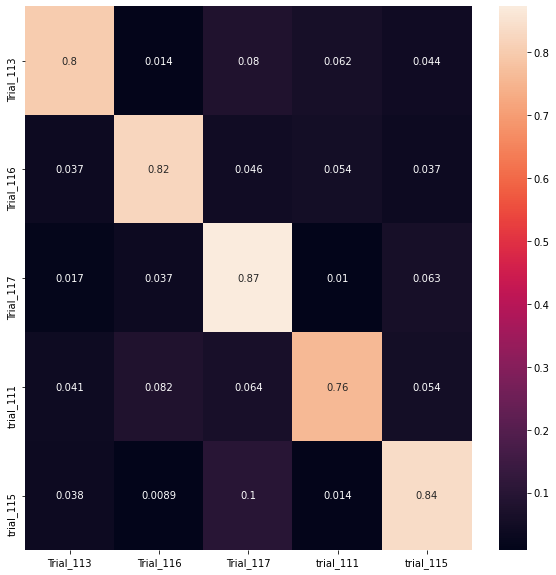

In [52]:
def inv_Transform_result(y_pred):    
    y_pred = y_pred.argmax(axis=1)
    y_pred = encode.inverse_transform(y_pred)
    return y_pred






Y_pred=inv_Transform_result(y_pred)
Y_test = inv_Transform_result(y_test)




from sklearn.metrics import confusion_matrix


plt.figure(figsize=(10,10))
cm = confusion_matrix(Y_test, Y_pred,normalize='true')
f = sns.heatmap(cm, annot=True,xticklabels=encode.classes_,yticklabels=encode.classes_)
plt.show()

In [53]:

y_test_class=np.argmax(y_test,axis=1)
y_pred_class=np.argmax(y_pred,axis=1)
from sklearn.metrics import confusion_matrix, classification_report
print(classification_report(y_test_class,y_pred_class))


              precision    recall  f1-score   support

           0       0.85      0.80      0.83       774
           1       0.85      0.82      0.84       800
           2       0.75      0.87      0.80       779
           3       0.85      0.76      0.80       803
           4       0.81      0.84      0.82       786

    accuracy                           0.82      3942
   macro avg       0.82      0.82      0.82      3942
weighted avg       0.82      0.82      0.82      3942



In [54]:
X_train_encode = encoder.predict(X_train)
X_test_encode = encoder.predict(X_test)
##y_train_encode = encoder.predict(y_train)
##y_test_encode = encoder.predict(y_test)
##y_pred=encoder.predict(X_test_encode)
##y_test_=np.argmax(y_test,axis=1)
##y_pred_=np.argmax(y_pred,axis=0)


In [55]:
print(y_train.shape)
print(y_test.shape)


(5913, 5)
(3942, 5)


In [56]:
X_pre_aen = encoder.predict(X)
X_t_sne = TSNE(n_components=2,verbose=1, perplexity=40, n_iter=300).fit_transform(X_pre_aen )

C:\Users\abulf\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\abulf\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 9855 samples in 0.001s...
[t-SNE] Computed neighbors for 9855 samples in 2.271s...
[t-SNE] Computed conditional probabilities for sample 1000 / 9855
[t-SNE] Computed conditional probabilities for sample 2000 / 9855
[t-SNE] Computed conditional probabilities for sample 3000 / 9855
[t-SNE] Computed conditional probabilities for sample 4000 / 9855
[t-SNE] Computed conditional probabilities for sample 5000 / 9855
[t-SNE] Computed conditional probabilities for sample 6000 / 9855
[t-SNE] Computed conditional probabilities for sample 7000 / 9855
[t-SNE] Computed conditional probabilities for sample 8000 / 9855
[t-SNE] Computed conditional probabilities for sample 9000 / 9855
[t-SNE] Computed conditional probabilities for sample 9855 / 9855
[t-SNE] Mean sigma: 1.380008
[t-SNE] KL divergence after 250 iterations with early exaggeration: 76.759010
[t-SNE] KL divergence after 300 iterations: 2.669665


In [57]:
tSNEdf = pd.DataFrame(data = X_t_sne, columns = ['t-SNE component 1', 't-SNE component 2'])
tSNEdf['Fault']=Y

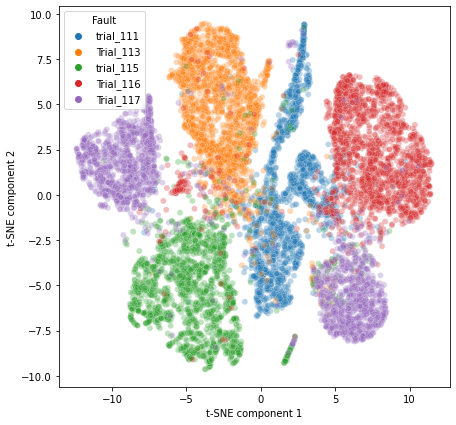

In [58]:
fig, ax = plt.subplots(figsize=(7,7))
sns.scatterplot(x=tSNEdf['t-SNE component 1'],y=tSNEdf['t-SNE component 2'],hue='Fault',
    data=tSNEdf,
    legend="full",
    alpha=0.3)
plt.show()

In [59]:
print(X_train_encode.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(5913, 125)
(3942, 1000)
(5913, 5)
(3942, 5)


In [60]:
X=encoder.predict(X)

In [61]:
tSNEdf

,t-SNE component 1,t-SNE component 2,Fault
0,1.196817,3.539866,trial_111
1,1.019438,-4.642870,trial_111
2,2.414958,3.990352,trial_111
3,2.896104,9.295681,trial_111
4,3.099954,6.277383,trial_111
...,...,...,...
9850,2.026445,7.088991,Trial_117
9851,-7.756217,3.630072,Trial_117
9852,-7.881902,1.440419,Trial_117
9853,-7.774018,3.291347,Trial_117


In [62]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout, Flatten



no_classes=len(encode.classes_)
model = Sequential()
model.add(Dense(125, input_shape=(X.shape[1],), activation='relu'))
model.add(Dense(250, activation='relu'))
model.add(Dense(500, activation='relu'))
model.add(Dense(750, activation='relu'))
model.add(Dense(1000, activation='relu'))
model.add(Dense(no_classes, activation='softmax'))
model.summary()

# compile the model
model.compile(optimizer='RMSprop', 
              loss='categorical_crossentropy',
              metrics=['accuracy'])

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_22 (Dense)            (None, 125)               15750     
                                                                 
 dense_23 (Dense)            (None, 250)               31500     
                                                                 
 dense_24 (Dense)            (None, 500)               125500    
                                                                 
 dense_25 (Dense)            (None, 750)               375750    
                                                                 
 dense_26 (Dense)            (None, 1000)              751000    
                                                                 
 dense_27 (Dense)            (None, 5)                 5005      
                                                                 
Total params: 1,304,505
Trainable params: 1,304,505
No

In [63]:
history = model.fit(X_train_encode ,
                    y_train,
                    epochs=50, 
                    batch_size=32,
                    shuffle=True,
                    validation_data=(X_test_encode ,y_test),
                    verbose=1)

Epoch 1/50
185/185 [==============================] - 4s 21ms/step - loss: 0.0940 - accuracy: 0.9707 - val_loss: 1.9622 - val_accuracy: 0.7955
Epoch 2/50
185/185 [==============================] - 4s 20ms/step - loss: 0.0231 - accuracy: 0.9963 - val_loss: 2.2721 - val_accuracy: 0.8232
Epoch 3/50
185/185 [==============================] - 4s 19ms/step - loss: 0.0162 - accuracy: 0.9981 - val_loss: 3.0654 - val_accuracy: 0.8318
Epoch 4/50
185/185 [==============================] - 4s 20ms/step - loss: 0.0062 - accuracy: 0.9986 - val_loss: 3.2922 - val_accuracy: 0.8331
Epoch 5/50
185/185 [==============================] - 4s 23ms/step - loss: 0.0052 - accuracy: 0.9995 - val_loss: 3.5267 - val_accuracy: 0.8379
Epoch 6/50
185/185 [==============================] - 4s 22ms/step - loss: 0.0029 - accuracy: 0.9995 - val_loss: 4.8662 - val_accuracy: 0.8336
Epoch 7/50
185/185 [==============================] - 4s 22ms/step - loss: 0.0055 - accuracy: 0.9990 - val_loss: 5.3950 - val_accuracy: 0.8260

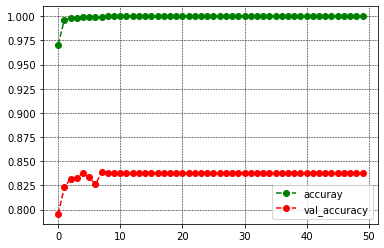

In [64]:
plt.plot(history.history['accuracy'],'go--')
plt.plot(history.history['val_accuracy'],'ro--')
plt.legend(['accuray','val_accuracy'])
plt.grid(color='k', linestyle='--', linewidth=0.5)
plt.show()

In [65]:
y_pred=model.predict(X_test_encode)
print(y_pred)
print(y_pred.shape)

[[5.27606606e-16 1.00000000e+00 2.34914744e-17 1.81984863e-18
  3.10425674e-15]
 [4.47123821e-30 1.00000000e+00 1.26047260e-31 8.74609674e-34
  1.08729885e-26]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00 0.00000000e+00
  0.00000000e+00]
 ...
 [2.65892726e-33 0.00000000e+00 8.45457573e-31 1.00000000e+00
  3.22197289e-31]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00 0.00000000e+00
  0.00000000e+00]
 [1.00000000e+00 3.93681000e-19 1.07950818e-19 1.98545624e-14
  1.08283701e-18]]
(3942, 5)


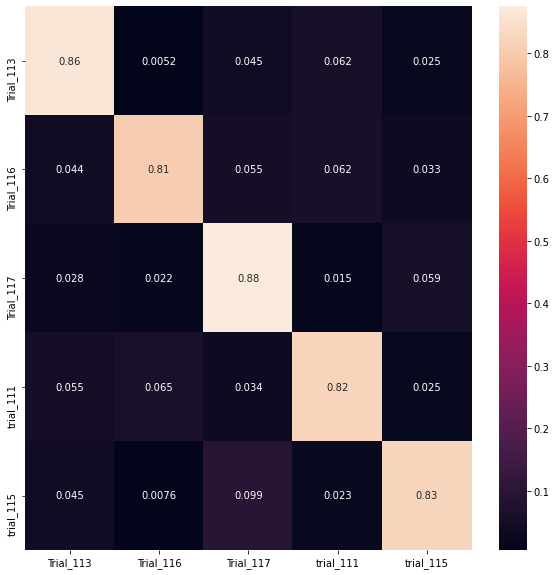

In [66]:
def inv_Transform_result(y_pred):    
    y_pred = y_pred.argmax(axis=1)
    y_pred = encode.inverse_transform(y_pred)
    return y_pred






Y_pred=inv_Transform_result(y_pred)
Y_test = inv_Transform_result(y_test)




from sklearn.metrics import confusion_matrix


plt.figure(figsize=(10,10))
cm = confusion_matrix(Y_test, Y_pred,normalize='true')
f = sns.heatmap(cm, annot=True,xticklabels=encode.classes_,yticklabels=encode.classes_)
plt.show()

In [67]:
print(X_train.shape)
print(X_test.shape)
print(X_train_encode.shape)
print(X_test_encode.shape)
print(y_train.shape)
print(y_test.shape)

(5913, 1000)
(3942, 1000)
(5913, 125)
(3942, 125)
(5913, 5)
(3942, 5)


In [68]:
dummy_ann = Model(inputs=model.input,outputs=model.layers[-3].output)
y_viz = dummy_ann.predict(X_train_encode)
y_viz.shape

(5913, 750)

In [69]:
def T_SNE_plot(X_train_encode,y_train,model,encode):
    
    dummy_ann = Model(inputs=model.input,outputs=model.layers[-2].output)
    y_viz = dummy_ann.predict(X_train_encode)
    
    from sklearn.manifold import TSNE

    X_t_sne = TSNE(n_components=2,verbose=1, perplexity=40, n_iter=300).fit_transform(y_viz)

    tSNEdf = pd.DataFrame(data = X_t_sne, columns = ['T-SNE component 1', 'T-SNE component 2'])

    tSNEdf['Fault']=inv_Transform_result(y_train)


    # Plot the PC-1 and PC-2
    fig, ax = plt.subplots(figsize=(10,10))
    sns.scatterplot(x=tSNEdf['T-SNE component 1'],y=tSNEdf['T-SNE component 2'],hue='Fault',
        data=tSNEdf,
        legend="full",
        alpha=0.3)
    plt.show()

C:\Users\abulf\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\abulf\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 5913 samples in 0.000s...
[t-SNE] Computed neighbors for 5913 samples in 1.238s...
[t-SNE] Computed conditional probabilities for sample 1000 / 5913
[t-SNE] Computed conditional probabilities for sample 2000 / 5913
[t-SNE] Computed conditional probabilities for sample 3000 / 5913
[t-SNE] Computed conditional probabilities for sample 4000 / 5913
[t-SNE] Computed conditional probabilities for sample 5000 / 5913
[t-SNE] Computed conditional probabilities for sample 5913 / 5913
[t-SNE] Mean sigma: 1.183398
[t-SNE] KL divergence after 250 iterations with early exaggeration: 57.001930
[t-SNE] KL divergence after 300 iterations: 1.362334


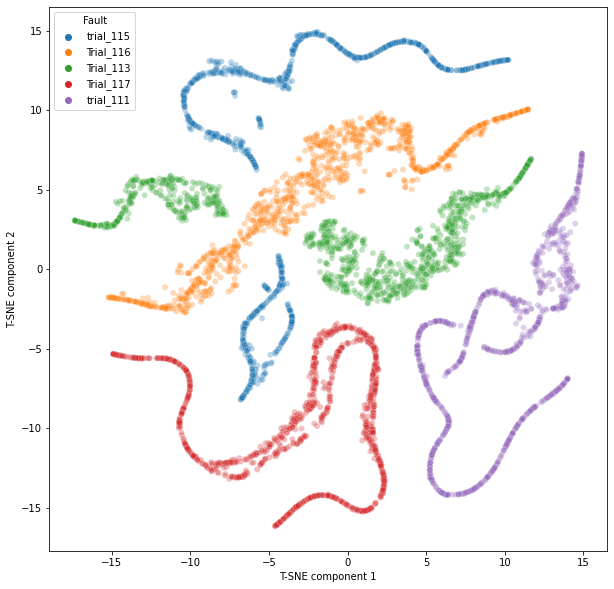

In [70]:
T_SNE_plot(X_train_encode,y_train,model,encode)

In [71]:

y_test_class=np.argmax(y_test,axis=1)
y_pred_class=np.argmax(y_pred,axis=1)

In [72]:
from sklearn.metrics import confusion_matrix, classification_report
print(classification_report(y_test_class,y_pred_class))

              precision    recall  f1-score   support

           0       0.83      0.86      0.85       774
           1       0.89      0.81      0.85       800
           2       0.79      0.88      0.83       779
           3       0.84      0.82      0.83       803
           4       0.85      0.83      0.84       786

    accuracy                           0.84      3942
   macro avg       0.84      0.84      0.84      3942
weighted avg       0.84      0.84      0.84      3942

